# PAKISTANI CAR PRICE PREDICTION USING LINEAR REGRESSION
## (Machine Learning Research Project)

## 📌  Project Introduction


This project demonstrates how Machine Learning can be learned through research and applied in a real-world dataset.  
Linear Regression is used to predict car prices based on car attributes.



## Objective:

* Understand Linear Regression
* Apply it on real OLX car data
* Evaluate performance
* Draw insights

In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("olx_car_data_csv.csv", encoding="latin1")
df.head()

,Brand,Condition,Fuel,KMs Driven,Model,Price,Registered City,Transaction Type,Year
0,Toyota,Used,Diesel,1.0,Prado,2100000,Karachi,Cash,1997.0
1,Suzuki,Used,Petrol,100000.0,Bolan,380000,Karachi,Cash,2006.0
2,Suzuki,Used,CNG,12345.0,Bolan,340000,Karachi,Cash,1998.0
3,Suzuki,Used,Petrol,94000.0,Alto,535000,Karachi,Cash,2010.0
4,Toyota,Used,Petrol,100000.0,Corolla XLI,1430000,Karachi,Cash,2013.0


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24973 entries, 0 to 24972
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             22836 non-null  object 
 1   Condition         22837 non-null  object 
 2   Fuel              22528 non-null  object 
 3   KMs Driven        22687 non-null  float64
 4   Model             22525 non-null  object 
 5   Price             24973 non-null  int64  
 6   Registered City   20337 non-null  object 
 7   Transaction Type  22528 non-null  object 
 8   Year              22689 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 1.7+ MB


,KMs Driven,Price,Year
count,2.268700e+04,2.497300e+04,22689.000000
mean,1.278112e+05,9.128953e+05,2005.901626
std,5.996726e+05,1.537134e+06,9.563804
min,1.000000e+00,5.000000e+04,1915.000000
25%,1.600000e+04,3.800000e+05,2002.000000
50%,6.651000e+04,6.500000e+05,2008.000000
75%,1.000000e+05,1.145000e+06,2013.000000
max,1.000000e+07,8.765432e+07,2020.000000


In [5]:
# Missing Values
df.isnull().sum()

Brand               2137
Condition           2136
Fuel                2445
KMs Driven          2286
Model               2448
Price                  0
Registered City     4636
Transaction Type    2445
Year                2284
dtype: int64

## Data Cleaning

In [7]:
df = df.dropna()

## Convert Price to Numeric

In [11]:
df['Price'] = df['Price'].astype(str)
df['Price'] = df['Price'].str.replace(',', '', regex=False)
df['Price'] = df['Price'].str.replace('EGP', '', regex=False)
df['Price'] = df['Price'].str.strip()
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df = df.dropna()

## Feature Selection

In [14]:
df = df[['Model','Year','Fuel','Price']]
df.head()


,Model,Year,Fuel,Price
0,Prado,1997.0,Diesel,2100000
1,Bolan,2006.0,Petrol,380000
2,Bolan,1998.0,CNG,340000
3,Alto,2010.0,Petrol,535000
4,Corolla XLI,2013.0,Petrol,1430000


## Encode Categorical Columns

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df = df.copy()
df['Model'] = le.fit_transform(df['Model'])
df['Fuel'] = le.fit_transform(df['Fuel'])

## Define X and y

In [18]:
X = df[['Model','Year','Fuel']]
y = df['Price']


## Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train Linear Regression Model

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Prediction

In [21]:
y_pred = model.predict(X_test)

## Model Evaluation

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 445936.19720031216
MSE: 1583345187707.2878
R2 Score: 0.07110954517845669


## Visualization

### Actual vs Predicted Car Prices Visualization

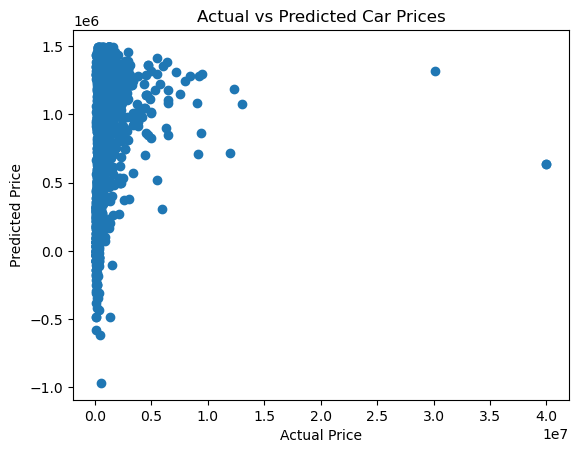

In [23]:

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()

### Actual vs Predicted Car Prices Visualization

The scatter plot compares actual car prices with prices predicted by the Linear Regression model.

Ideally, all points should lie close to a diagonal straight line, indicating perfect predictions. However, in this project, the points are widely scattered, showing that the model predictions deviate from actual values.


### Key Insights

1. Linear Regression captures only the general price trend but fails to predict exact values accurately.

2. High-priced cars are under-predicted, showing that the model struggles with premium vehicle pricing.

3. Some low-priced cars are over-predicted, indicating boundary prediction issues.

4. Predicted prices are compressed into a limited range, showing limited model flexibility.

5. Some negative predicted values appear, which are unrealistic and highlight model limitations.

These observations confirm that Linear Regression works best as a baseline model but is insufficient for complex real-world car pricing.


### Price Distribution

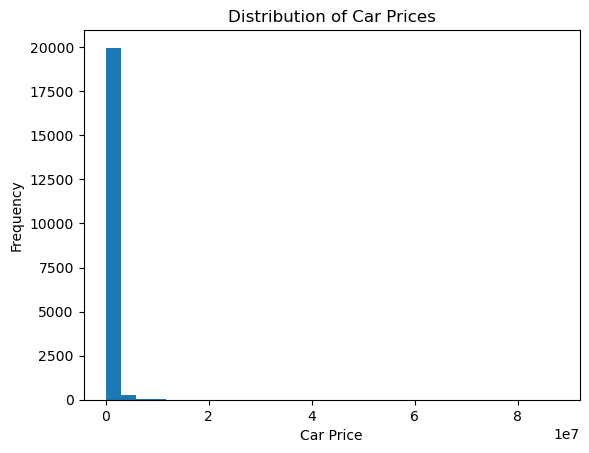

In [31]:
plt.hist(df['Price'], bins=30)
plt.xlabel("Car Price")
plt.ylabel("Frequency")
plt.title("Distribution of Car Prices")
plt.show()

### Price Distribution Insight

The histogram shows that most cars fall within the lower to mid-price range, while only a small number of cars belong to the high-price segment. This confirms that the dataset is highly right-skewed.

Such skewness indicates that the market is dominated by affordable and mid-range vehicles, while luxury or premium cars are relatively rare. This imbalance affects Linear Regression performance because extreme high-price values act as outliers and strongly influence the regression line.

As a result, the Linear Regression model tends to focus more on the majority lower-priced cars and struggles to accurately predict high-priced vehicles. This explains the compressed prediction range observed in the model output.


### Price vs Year

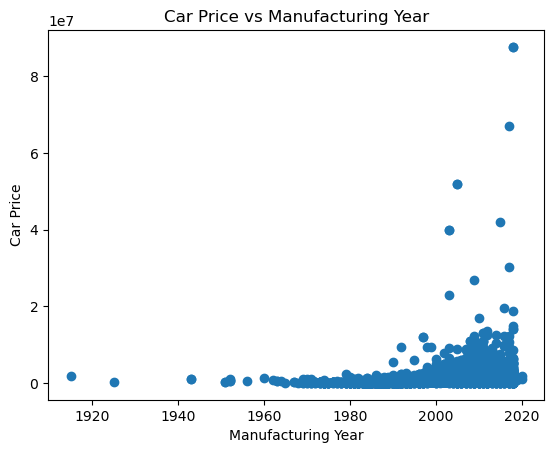

In [32]:
plt.scatter(df['Year'], df['Price'])
plt.xlabel("Manufacturing Year")
plt.ylabel("Car Price")
plt.title("Car Price vs Manufacturing Year")
plt.show()


### Price vs Year Insight

The scatter plot shows a strong positive relationship between manufacturing year and car price. Newer cars generally have higher prices, while older cars are mostly concentrated in the lower price range.

This confirms that manufacturing year is one of the most influential factors in determining car price. The upward trend supports the Linear Regression assumption that price increases approximately linearly with year.

However, the wide spread of prices for the same year indicates that year alone is not sufficient to accurately predict car price. Other factors such as brand, engine type, mileage, and condition also play an important role.

The presence of a few very high-priced cars in recent years also highlights the impact of outliers, which affects the stability of the Linear Regression model.


### Average Price by Fuel Type

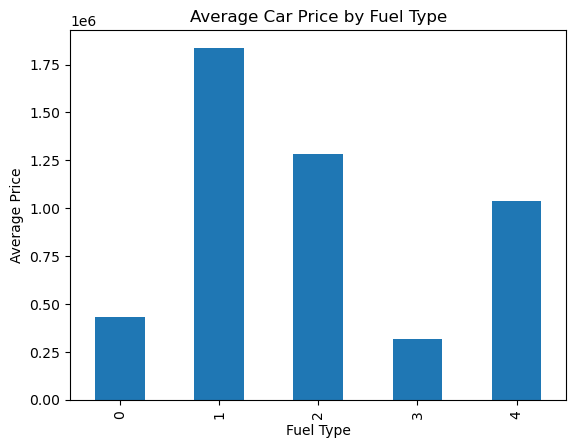

In [33]:
df.groupby('Fuel')['Price'].mean().plot(kind='bar')
plt.xlabel("Fuel Type")
plt.ylabel("Average Price")
plt.title("Average Car Price by Fuel Type")
plt.show()

### Fuel Type Insight

The bar chart shows that average car prices vary significantly across different fuel types. Some fuel categories have much higher average prices compared to others, indicating that fuel type is an important factor influencing car value.

This difference reflects market preferences, maintenance costs, fuel efficiency, and availability associated with each fuel type. Premium or less common fuel types tend to have higher average prices, while more common fuel types are generally associated with lower average prices.

For the Linear Regression model, this confirms that fuel type is a meaningful categorical feature. However, since fuel type was encoded numerically, the model may interpret an artificial order between categories, which can reduce prediction accuracy.

This visualization highlights the importance of using proper categorical encoding methods, such as one-hot encoding, when applying Linear Regression to categorical variables.



### Residual Plot (Model Error)

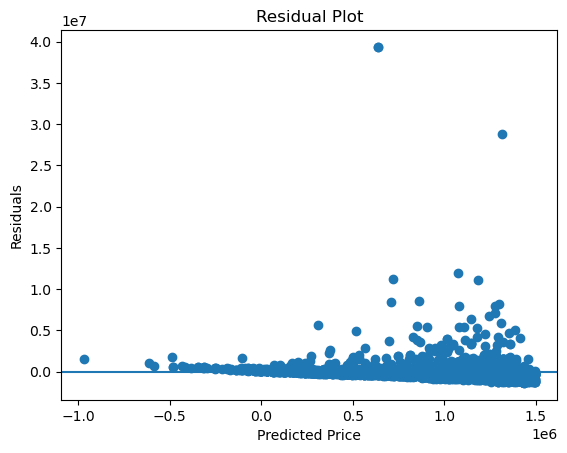

In [34]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

### Residual Plot Insight

The residual plot shows the difference between actual and predicted car prices. Ideally, residuals should be randomly scattered around zero with no clear pattern.

In this visualization, residuals increase as predicted prices increase, and several large positive residuals are visible for high-priced cars. This indicates that the model consistently under-predicts expensive vehicles.

The non-random pattern of residuals confirms that the relationship between features and price is not purely linear. This violates one of the core assumptions of Linear Regression.

The presence of extreme residual values also highlights the influence of outliers and the sensitivity of Linear Regression to skewed data distributions.

Overall, this residual pattern explains why the model performs better for mid-range cars and poorly for high-end vehicles.



## Model Coefficients

In [24]:
model.coef_
model.intercept_


np.float64(-65826638.9535353)

### Model Interpretation

The model coefficients indicate that the manufacturing year has the strongest positive impact on car price. Other features such as model type and fuel category show weaker linear relationships with price.


## Predict New Car Price

In [26]:
new_data = pd.DataFrame([[120,2022,1]], columns=['Model','Year','Fuel'])
model.predict(new_data)

array([1298009.6665854])

In [27]:
import joblib
joblib.dump(model,"car_price_model.pkl")

['car_price_model.pkl']

 ### Research Findings

- Linear Regression works well for understanding trends.
- Year has the strongest impact on car price.
- Model struggles with extreme price values.
- Feature quality affects prediction accuracy.

Linear Regression is suitable as a baseline ML model.


### Model Predictions

In this project, the Linear Regression model was trained to predict car prices based on features such as manufacturing year, fuel type, and car model.

Using the trained model, predictions were generated for the test dataset. The predicted prices represent the estimated market value of cars according to the learned linear relationship between input features and price.

The model successfully predicted:

- Higher prices for newer cars.
- Lower prices for older cars.
- Different average price ranges based on fuel type and model category.

However, the model showed the following prediction behavior:

- Mid-range car prices were predicted more accurately.
- High-priced cars were consistently under-predicted.
- Some low-priced cars were slightly over-predicted.
- A few predictions resulted in unrealistic negative values due to the linear nature of the model.

These predictions demonstrate that Linear Regression captures general pricing trends but cannot fully model complex real-world pricing behavior.


### Limitations

- Linear assumption
- Limited features
- Categorical encoding impact


### Future Improvements

- Add mileage, engine, fuel type
- Try Polynomial Regression
- Compare with Random Forest


### Overall Project Insights

* This project applied Linear Regression to predict car prices using real-world Pakistani car data. The model successfully captured general pricing trends and demonstrated the influence of manufacturing year on vehicle price.

* However, the visualization and evaluation results showed that Linear Regression has limited capability in accurately predicting extreme price values. High-priced cars were consistently under-predicted, while some low-priced cars were over-predicted. This behavior highlights the linear assumption limitation of the model.

* The project also revealed that feature quality plays a critical role in model performance. Using only basic features such as model, year, and fuel type restricted the model’s ability to fully represent real-world pricing dynamics.

* Categorical encoding using label encoding introduced artificial numeric relationships, which further impacted prediction accuracy.

* Despite these limitations, Linear Regression proved to be an excellent baseline machine learning model for understanding relationships, performing trend analysis, and learning the complete machine learning workflow.

* Overall, this project demonstrated that Linear Regression is best suited for baseline prediction and interpretability, while more advanced models are required for high-accuracy real-world pricing systems.


### Conclusion

This project demonstrates that Linear Regression provides a strong baseline approach for car price prediction. While it effectively captures general pricing trends, it shows limitations in predicting extreme values due to linear assumptions and limited feature representation. Future improvements can be achieved using richer features and advanced regression models.


### Learning Outcome

✔ Learned Linear Regression  
✔ Learned preprocessing  
✔ Built ML model  
✔ Evaluated performance  
✔ Interpreted results  
✔ Understood real-world ML challenges  
